In [ ]:
import pandas as pd
df = pd.read_csv('Emotion_final.csv')

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
category = pd.get_dummies(df.Emotion)
category

,anger,fear,happy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
21454,0,1,0,0,0,0
21455,0,1,0,0,0,0
21456,0,1,0,0,0,0
21457,0,1,0,0,0,0


In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Emotion')
new_df

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [ ]:
text = new_df['Text'].values
label = new_df[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [ ]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 100
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
537/537 - 22s - loss: 1.4466 - accuracy: 0.3539 - val_loss: 1.1918 - val_accuracy: 0.4175
Epoch 2/100
537/537 - 20s - loss: 1.1148 - accuracy: 0.4498 - val_loss: 1.0885 - val_accuracy: 0.4399
Epoch 3/100
537/537 - 20s - loss: 0.9443 - accuracy: 0.5533 - val_loss: 0.8906 - val_accuracy: 0.6419
Epoch 4/100
537/537 - 20s - loss: 0.7239 - accuracy: 0.6907 - val_loss: 0.7184 - val_accuracy: 0.7125
Epoch 5/100
537/537 - 20s - loss: 0.5842 - accuracy: 0.7437 - val_loss: 0.6301 - val_accuracy: 0.7300
Epoch 6/100
537/537 - 20s - loss: 0.4875 - accuracy: 0.7834 - val_loss: 0.5864 - val_accuracy: 0.7582
Epoch 7/100
537/537 - 20s - loss: 0.4057 - accuracy: 0.8126 - val_loss: 0.6249 - val_accuracy: 0.7747
Epoch 8/100
537/537 - 20s - loss: 0.3364 - accuracy: 0.8629 - val_loss: 0.5739 - val_accuracy: 0.8518
Epoch 9/100
537/537 - 20s - loss: 0.2411 - accuracy: 0.9225 - val_loss: 0.4366 - val_accuracy: 0.8938
Epoch 10/100
537/537 - 20s - loss: 0.1848 - accuracy: 0.9426 - val_loss: 0.5334 - 

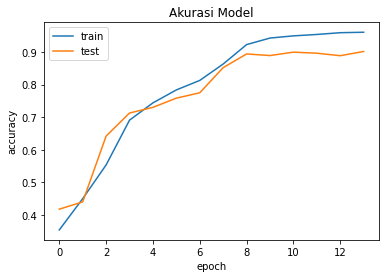

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

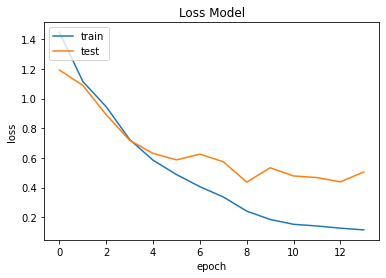

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()